## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [4]:
X_na = X[X.isna().any(axis=1)]
X_na

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


Пропущенных значений нет

In [7]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Категориальных значений также нет, все переменные имеют тип float64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

В целом это не особо и важно, если выборку перемешать (а разбиение и так случайным образом делается), но я сделал со stratify.

In [8]:
np.random.seed(42)

In [12]:
X.shape

(178, 13)

In [16]:
bins = np.linspace(0, 178, 20) # создаём разметку на бины

y_binned = np.digitize(y, bins) # разбиваем y на бины

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y_binned) # разбиваем выборку на train и test

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [54]:
def pretty_output(o, length):
    return str(o) + ' ' * (length - len(str(o))) # чисто для красивового вывода по столбикам

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[["alcohol", "magnesium"]]) # нормализуем
X_test_scaled = scaler.fit_transform(X_test[["alcohol", "magnesium"]]) # нормализуем

print("NN     train    test")

knc_array = []

n_neighbors = [1, 3, 5, 10, 15, 25] # массив числа соседей
for i in n_neighbors:
    knc = KNeighborsClassifier(n_neighbors=i) # выставляем нужное число соседей
    knc.fit(X_train_scaled, y_train) # тренируем на train-выборке
    knc_array.append(knc)
    train_pred = knc.predict(X_train_scaled) # предсказываем
    test_pred = knc.predict(X_test_scaled) # предсказываем
    train_rate = round(accuracy_score(train_pred, y_train), 2) # получаем долю ошибок
    test_rate = round(accuracy_score(test_pred, y_test), 2) # получаем долю ошибок
    print(f"{pretty_output(i, 2)}     {pretty_output(train_rate, 4)}     {pretty_output(test_rate, 4)}") # печатаем

NN     train    test
1      1.0      0.61
3      0.81     0.72
5      0.77     0.72
10     0.73     0.78
15     0.71     0.81
25     0.69     0.74


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [52]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 1.4/1.4 MB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [53]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

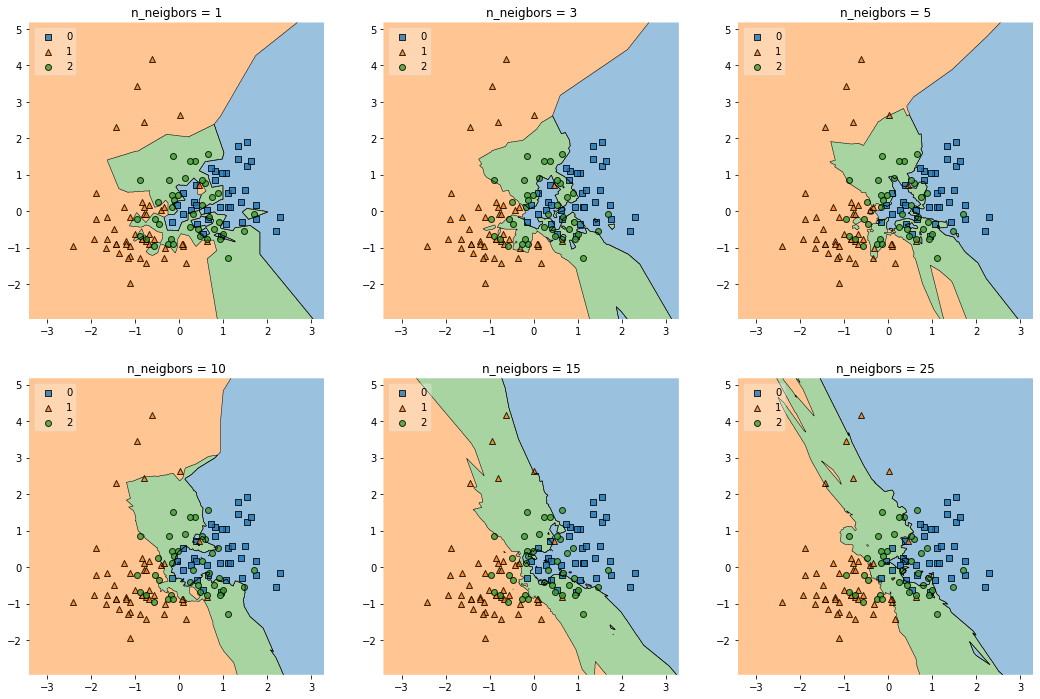

In [72]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(18, 12))

labels = ['n_neigbors = 1', 'n_neigbors = 3', 'n_neigbors = 5', 'n_neigbors = 10', 'n_neigbors = 15', 'n_neigbors = 25']
for clf, lab, grd in zip([knc_array[i] for i in range(6)],
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):

    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train_scaled), y=np.array(y_train), clf=clf, legend=2)
    plt.title(lab)
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Понятно, что на X_train при выборке одного соседа точность будет 1 или близка к ней: с наибольшй вероятностью объект из X_train окажется самым близким к самому себе (ведь обучение KNN классификатора заключается только в запоминании выборки), поэтому в моём случае точность оказалась равна 1. На X_train также видно, что точность падает при увеличении числа соседей: классификатор пытается найти закономерность в данных, а не просто под них подогнаться, отчего и делает больше ошибок. На X_test чуть интереснее: если при n_neigbors=1 модель подгонялась по тренировочную выборку (т. е. происходило переобучение) и доля правильных ответов на тесте маленькая, то при увеличении n_neigbors эта доля растёт до n_neigbors=15, после чего снова начинает убывать (так как 25 соседей, видимо, слишком много). Таким образом, оптимальное количество соседей, вероятно 15, что также подтверждается построенными графиками: на малом количестве соседей видно маленькие области одного цвета внутри другого - признак переобучения, наиболее адекватно распределение по цветам плоскости выглядит при n_neigbors=15



### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

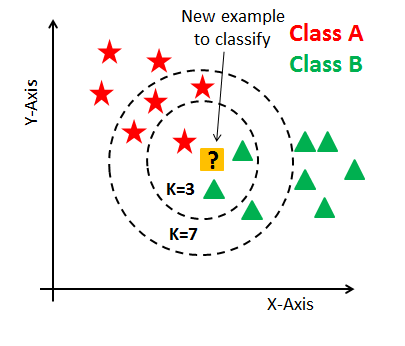

In [289]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X = X
      self.y = y

    def predict(self, X):
      ans = []
      for i in X:
        dist=np.apply_along_axis(lambda x: self.count_distance(i, x), 1, self.X) # потучеем массив расстояний
        idx = np.argpartition(dist, self.k)[:self.k] # получаем индексы k наименьших из них
        vals,counts = np.unique(self.y[idx], return_counts=True) # считаем количество каждого класса
        index = np.argmax(counts) # берём самый частый класс
        ans.append(vals[index]) # добавляем ответ в список
      return np.array(ans)


    def count_distance(self, x, y):
      return np.dot(x - y, (x - y).T)

In [290]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [291]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [353]:
data = pd.read_csv("https://github.com/hse-ds/iad-intro-ds/raw/master/2024/homeworks/hw04_knn_linreg/diamonds.csv")
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [354]:
data_na = data[data.isna().any(axis=1)]
data_na

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


Пропущенных значений нет

Судя по описанию по ссылке - https://www.kaggle.com/datasets/shivam2503/diamonds - столбец depth вычисляется по x, y, z => его можно дропнуть

In [355]:
data = data.drop("depth", axis=1)

Что мы и сделали

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [356]:
data.corr()

,Unnamed: 0,carat,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.181618,0.921591,0.975094,0.951722,0.953387
table,-0.100830,0.181618,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего кооррелирует, понятно, масса (carat), потом - размер x, y, z

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [357]:
data = pd.get_dummies(data)

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [358]:
y = data["price"]
data = data.drop("price", axis=1)

bins = np.linspace(0, 53940, 100) # создаём разметку на бины

y_binned = np.digitize(y, bins) # разбиваем y на бины

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y_binned) # разбиваем выборку на train и test

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [359]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # нормализуем
X_test = scaler.fit_transform(X_test) # нормализуем

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [360]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
print("train:", mean_squared_error(lr.predict(X_train), y_train))
print("test:", mean_squared_error(lr.predict(X_test), y_test))

train: 1267694.571273756
test: 3.3771870247426123e+27


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [362]:
lr.coef_

array([ 8.29703099e+01,  5.27066941e+03, -3.72233335e+01, -7.18252578e+02,
        4.79756250e+01, -3.83731049e+02, -6.29998828e+13, -1.06279220e+14,
       -1.80883489e+14, -1.61488206e+14, -1.53777601e+14, -5.60164493e+14,
       -6.50089969e+14, -6.42535110e+14, -6.85303773e+14, -6.06456925e+14,
       -5.04170222e+14, -3.72437344e+14,  5.71356766e+14,  8.79731374e+14,
        2.08799624e+15,  1.83162296e+15,  1.73402265e+15,  2.04098111e+15,
        1.22729337e+15,  1.42609089e+15])

In [364]:
data.columns

Index(['Unnamed: 0', 'carat', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

Как видим, большие по модулю веса у столбцов cut, color и clarity

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [372]:
from sklearn.linear_model import Lasso, Ridge

l = Lasso(alpha=10)
l.fit(X_train, y_train)
print("train lasso:", mean_squared_error(l.predict(X_train), y_train))
print("test lasso:", mean_squared_error(l.predict(X_test), y_test))

train lasso: 1277835.6207503877
test lasso: 1302862.1815971383


In [374]:
l.coef_

array([  87.28230596, 4837.19832256,  -31.97391959, -369.10359941,
         -0.        , -272.08914723, -135.15473647,  -47.39344523,
         49.25301665,    0.        ,   -0.        ,  143.95437013,
         88.00556741,   61.06533653,   -0.        , -170.90680715,
       -281.41568856, -401.5259884 , -490.19137869,  195.4726243 ,
       -257.8547846 , -575.18524969,   99.8983262 ,   -0.        ,
        185.51397125,  192.25812858])

Веса значительно уменьшились, возможно, проблема мультиколлинеарность проявлялась в начальной регрессии. Однако MSE значительно уменьшилась только на тестовой выборке.

In [373]:
r = Ridge(alpha=10)
r.fit(X_train, y_train)
print("train ridge:", mean_squared_error(r.predict(X_train), y_train))
print("test ridge:", mean_squared_error(r.predict(X_test), y_test))

train ridge: 1267710.111102981
test ridge: 1300523.6791560312


In [376]:
r.coef_

array([ 8.41197693e+01,  5.23638550e+03, -3.80328609e+01, -6.86327771e+02,
        4.42235292e+01, -3.79161339e+02, -1.38708064e+02, -4.91702177e+01,
        6.15773862e+01,  1.43387478e+01,  3.31968379e+00,  2.09213678e+02,
        1.60065422e+02,  1.33192755e+02,  5.78366838e+01, -1.26649155e+02,
       -2.50963320e+02, -3.84312236e+02, -4.73645886e+02,  2.48709874e+02,
       -1.51127713e+02, -4.90568209e+02,  2.02447545e+02,  1.04166568e+02,
        2.54599632e+02,  2.73330354e+02])

Веса значительно уменьшились, возможно, проблема мультиколлинеарность проявлялась в начальной регрессии. Однако MSE значительно уменьшилась только на тестовой выборке.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [381]:
alpha = [0.1, 1, 10, 100, 200]

lasso = [Lasso(alpha[i]) for i in range(5)]
ridge = [Ridge(alpha[i]) for i in range(5)]
for i in range(5):
    lasso[i].fit(X_train, y_train)
    ridge[i].fit(X_train, y_train)

c:\Users\extra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.497e+08, tolerance: 6.009e+07
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'np.linalg.norm(coef_)')

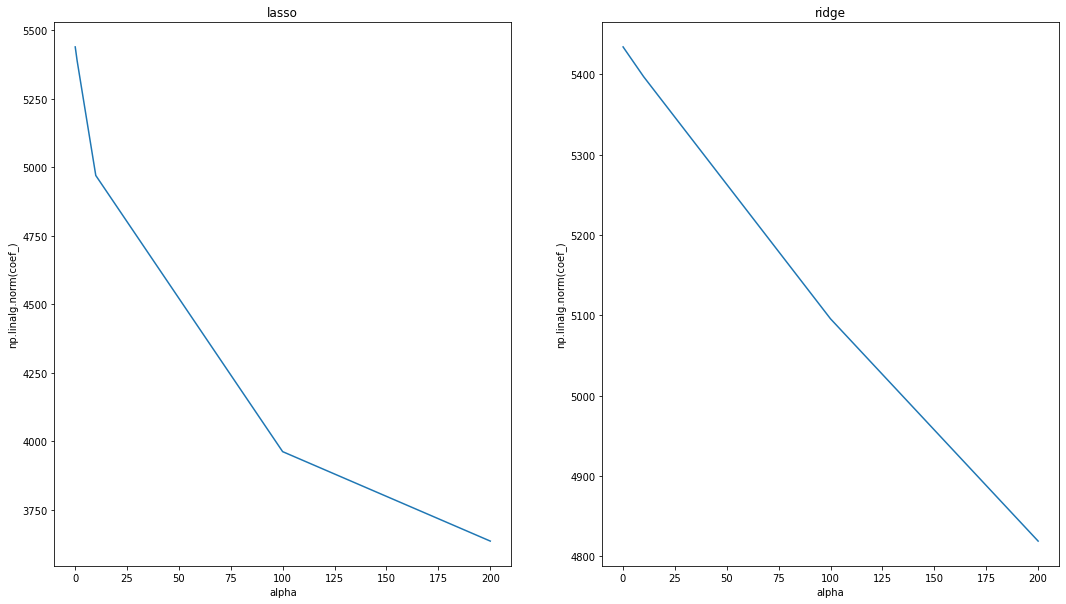

In [394]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
y_lasso = [np.linalg.norm(lasso[i].coef_) for i in range(5)]
y_ridge = [np.linalg.norm(ridge[i].coef_) for i in range(5)]
ax1.plot(alpha, y_lasso)
ax2.plot(alpha, y_ridge)
ax1.set_title("lasso")
ax2.set_title("ridge")
ax1.set_xlabel("alpha")
ax1.set_ylabel("np.linalg.norm(coef_)")
ax2.set_xlabel("alpha")
ax2.set_ylabel("np.linalg.norm(coef_)")

In [395]:
lasso[4].coef_

array([   0.        , 3613.1280881 ,   -0.        ,    0.        ,
          0.        ,    0.        ,   -0.        ,   -0.        ,
          0.        ,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
         -0.        , -115.4739281 , -260.13963162,    0.        ,
        -77.78461991, -285.37400337,    0.        ,    0.        ,
          0.        ,   13.52907403])

Как можем видеть, лассо агрессивнее уменьшает веса. Его нередко используют для отбора признаков, так как этот метод (как видно по выводу строчки выше) часто зануляет некоторые веса, вместо того, чтобы делать их все ненулевыми, но небольшими.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [402]:
from sklearn.linear_model import LassoCV

lassoCV = LassoCV(cv = 5, alphas=[0.1, 1, 10, 100, 200])
lassoCV.fit(X_train, y_train)

LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)

In [405]:
lassoCV.alphas_

array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

In [404]:
lassoCV.mse_path_

array([[2020885.98789187, 1951691.9119819 , 2050955.46539188,
        1780759.93187867, 1960053.38113299],
       [1594430.27053119, 1523259.05805971, 1603924.40121516,
        1386887.50279109, 1524803.40917397],
       [1340089.74768132, 1278702.34182177, 1347231.61926365,
        1192704.33672992, 1246072.97630837],
       [1336251.44852565, 1272958.44496405, 1338633.74366946,
        1188321.71723894, 1222555.77416038],
       [1339236.84091677, 1273475.96204681, 1338369.21269408,
        1188899.39421549, 1220829.35520308]])

In [410]:
for i in range(5):
    print(f"alpha = {lassoCV.alphas_[i]}; mean = {lassoCV.mse_path_[i].mean()}")

alpha = 200.0; mean = 1952869.335655462
alpha = 100.0; mean = 1526660.9283542247
alpha = 10.0; mean = 1280960.2043610057
alpha = 1.0; mean = 1271744.2257116972
alpha = 0.1; mean = 1272162.1530152448


Как можем видеть, лучше всего ведёт себя регрессия при alpha = 1

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [411]:
lassoResult = Lasso(alpha=1)
lassoResult.fit(X_train, y_train)

Lasso(alpha=1)

In [412]:
lassoResult.coef_

array([  83.835117  , 5226.05397157,  -36.83945061, -663.46003891,
         16.99067527, -366.2969855 , -143.87421809,  -57.36922763,
         46.88572726,    0.        ,   -8.4073245 ,  160.5559321 ,
        103.91111109,   77.71076896,   -0.        , -177.27816017,
       -292.81298266, -414.97463186, -502.12701823,  202.84630907,
       -257.49748708, -583.47323127,  112.76428057,   -0.        ,
        190.99049654,  199.57447641])

In [413]:
data.columns

Index(['Unnamed: 0', 'carat', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

Как видим, в итоге большой вес имеет столбец carat (порядка тысяч, больше, чем все остальные веса). Это понятно, ведь от веса бриллианта действительно сильно линейно зависит его цена (да и в таблице корреляций мы видели, что масса - важный признак определения цены). Признак table оказался неинформативным. Размеры x, y, z имеют отрицательные веса, как будто чем меньне бриллиант - тем выше цена (хотя, возможно, это и так, учитывая то, что маленькие бриллианты сложнее огранять). По признакам cut, color и clarity коэффициенты действительно +- соответствуют заявленному влиянию на стоимость. Напомню шкалы:

cut: (Fair, Good, Very Good, Premium, Ideal)

color: J (worst) to D (best)

clarity: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Так, например, лучшая чистота (clarity_IF) имеет вес, больший остальных типов clarity (202.84630907), в то время как худшая clarity (clarity_I1) имеет вес -502.12701823. Аналогичные выводы можно сделать и о признаках color и cut.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [414]:
mean_squared_error(lassoResult.predict(X_test), y_test)

1299701.809633228

В обычной регрессии MSE была равна 3.3771870247426123e+27 на тесте. Метод Lasso помог избежать больших весов и, как следствие, переобучения. Модель перестала подгоняться под тренировочную выборку, и поэтому MSE на тесте сильно уменьшилось. Для предсказаний лучше использовать модель и использованием Lasso.